# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

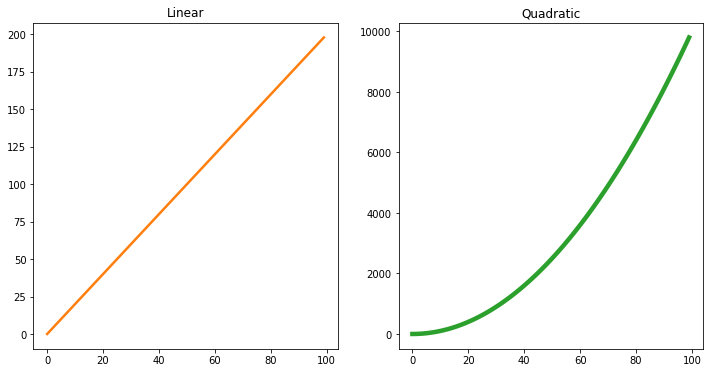

In [3]:
# Method 1 - using matplotlib (and creating subplots)

#creating the subplot area
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

#making nice little plots

ax1.plot(x,y,'tab:orange', linewidth = 2.5)
ax1.title.set_text('Linear')

ax2.plot(x,z, 'tab:green',linewidth = 4.5)
ax2.title.set_text('Quadratic')

plt.show()

In [4]:
# Method 2 - using seaborn 

#need to rearrange the data, cause seaborn is picky

data = pd.DataFrame({'x': x, 'y': y, 'z':z})
data.tail()

,x,y,z
95,95,190,9025
96,96,192,9216
97,97,194,9409
98,98,196,9604
99,99,198,9801


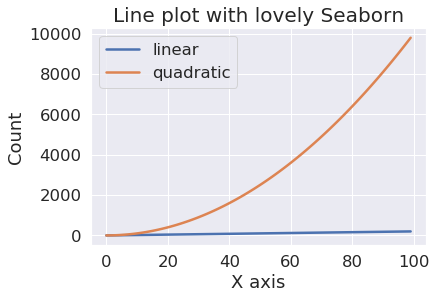

In [5]:
sns.set(style='darkgrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5}) #this makes stuff BIG


sns.lineplot(x = "x", y = "y", data=data, label='linear')
sns.lineplot(x = "x", y = "z", data=data, label='quadratic')
plt.xlabel("X axis")
plt.ylabel("Count")
                    
plt.title("Line plot with lovely Seaborn", fontsize = 20)
plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

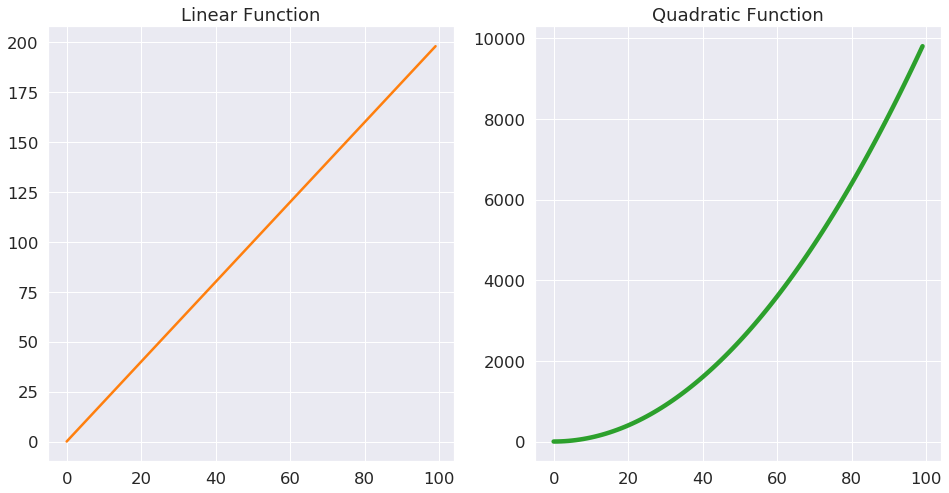

In [6]:
# your code here

# I had already used it, but I'll make it bigger now - BAM -

#creating the subplot area
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

#making nice little plots

ax1.plot(x,y,'tab:orange', linewidth = 2.5)
ax1.title.set_text('Linear Function')

ax2.plot(x,z, 'tab:green',linewidth = 4.5)
ax2.title.set_text('Quadratic Function')

plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

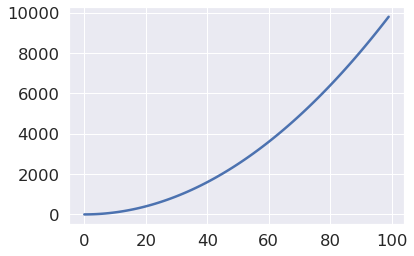

In [10]:
# your code here


'''I am very confused about this one. How is it possible to have two different 
scales on the same axis on the same plot?'''

#plt.plot(x,y, label = "linear")
plt.plot(x,z, label = "quadratic")

#plt.yscale("log")

plt.show()

#### As a bonus challenge, try to add a legend to the plot.

In [ ]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [29]:
# your code here
fitbit = pd.read_csv("Fitbit2.csv")
fitbit[['Work_or_Weekend','Months_encoded']]

db_f = fitbit.groupby("Months_encoded").agg({"Steps":"median"})
db_f.head()

,Steps
Months_encoded,
1,10366.0
2,9235.0
3,11122.0
4,13846.5
5,11998.0


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

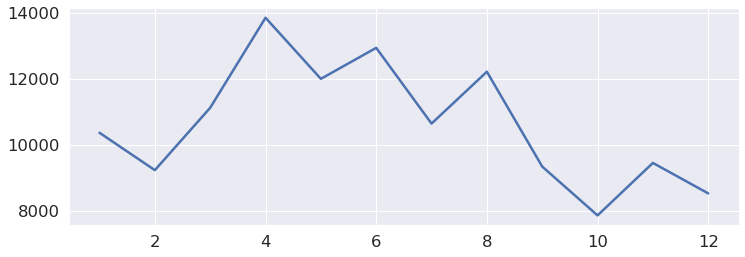

In [30]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here

plt.figure(figsize = (12,4))
plt.plot(db_f["Steps"])


In [31]:
# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

db_week = fitbit.groupby("Work_or_Weekend").agg({"Steps": "median"})
db_week

,Steps
Work_or_Weekend,
0,9998.0
1,10445.5


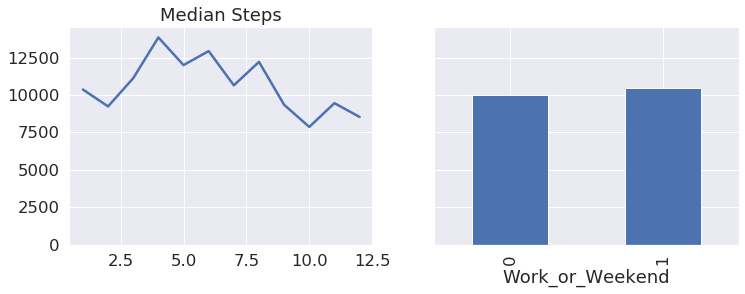

In [32]:
f, (ax1, ax2) = plt.subplots(1,2, sharey = True, figsize= (12,4))
ax1.plot(db_f["Steps"])
db_week["Steps"].plot.bar()
ax1.set_title("Median Steps")

plt.savefig("fig.png")

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

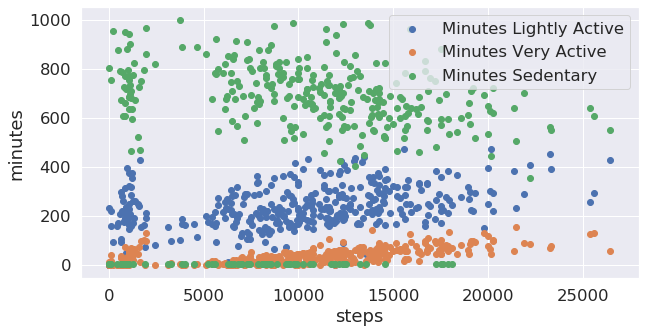

In [33]:
# your code here

fig, ax = plt.subplots(figsize = (10,5))
new_plot = fitbit[['Steps','Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']]
y = new_plot.columns[1:]

for col in y:
    plt.scatter(fitbit['Steps'], fitbit[col]),
    plt.xlabel('steps'),
    plt.ylabel('minutes'),
    plt.legend(y),

plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [34]:
# your code here

titanic = pd.read_csv("titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [36]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [37]:
# NUMERICAL VARIABLES
# your code here

titanic.select_dtypes(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [50]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include=['category']) 

#should it not be 'object'? There are not categorical types in the df

""
0
1
2
3
4
...
1304
1305
1306
1307


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [46]:
# your code here

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

#using the mpl module thingie

mpl.rcParams['figure.figsize'] = [12,6]

#### Use the right visulalization to show the distribution of column `Age`.

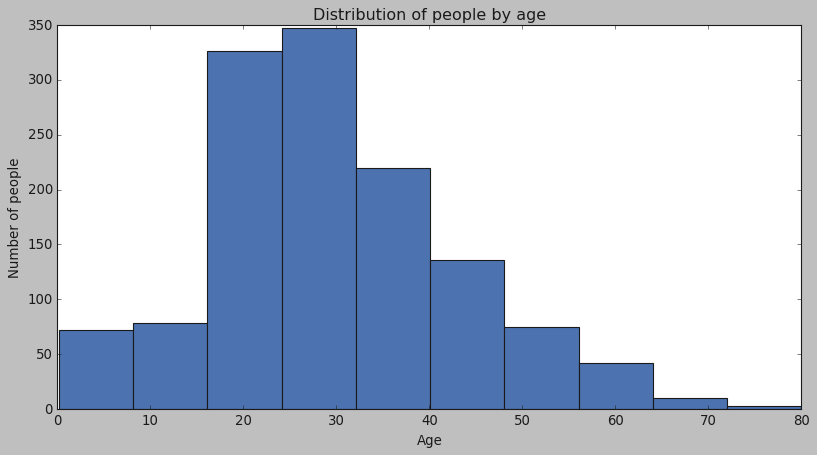

In [49]:
# your code here

plt.hist(titanic["Age"])
plt.title("Distribution of people by age")
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

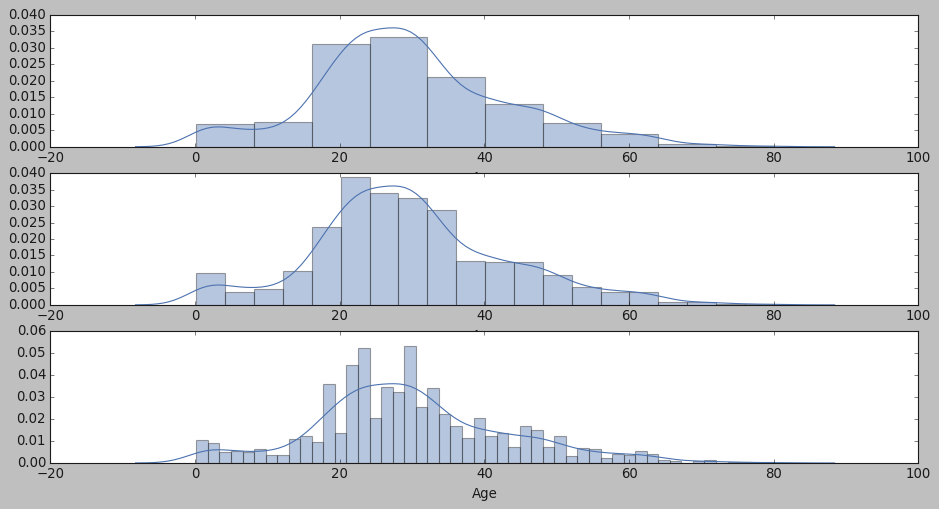

In [92]:
# your code here
f, axes = plt.subplots(3, figsize=(14, 7), sharex = False)
fig.suptitle("Distribution of people by age - bins")

ax1 = sns.distplot(titanic["Age"], bins = 10, ax = axes[0])
ax2 = sns.distplot(titanic["Age"], bins = 20, ax = axes[1])
ax3 = sns.distplot(titanic["Age"], bins = 50, ax = axes[2])

plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
It affects the width of each bar of the historgram. the more the bins, the narrower the bars.
which means we have a mor granular view of the distribution.
"""

#### Use seaborn to show the distribution of column `Age`.

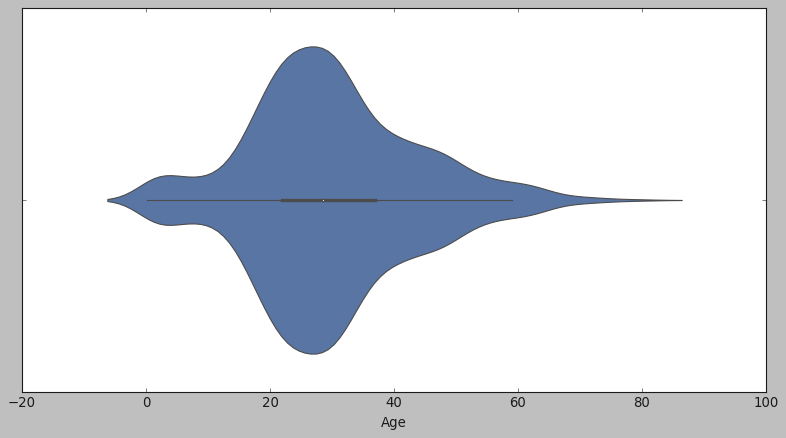

In [65]:
# your code here

ax = sns.violinplot(x="Age", data=titanic)

'''could also be a boxplot or a historgram but the boxplot looks weird
and the histogram is boring'''

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

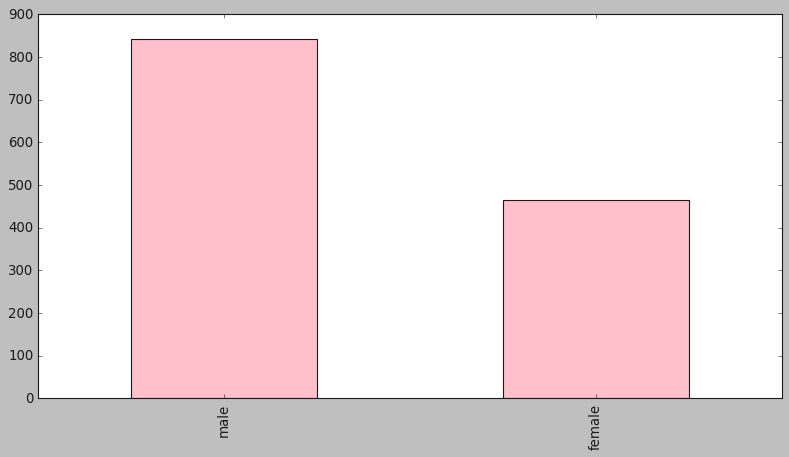

In [70]:
# Method 1 - matplotlib
# your code here

titanic['Gender'].value_counts().plot(kind='bar', color=["pink"])

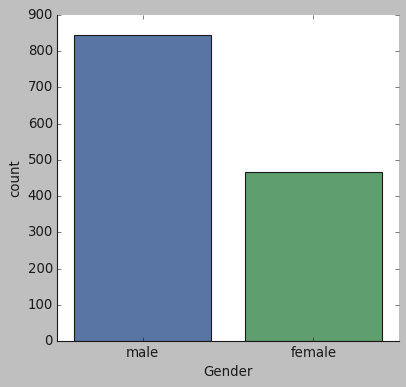

In [83]:
# Method 2 - seaborn
# your code here


sns.catplot('Gender', data=titanic, kind="count")

#### Use the right plot to visualize the column `Pclass`.

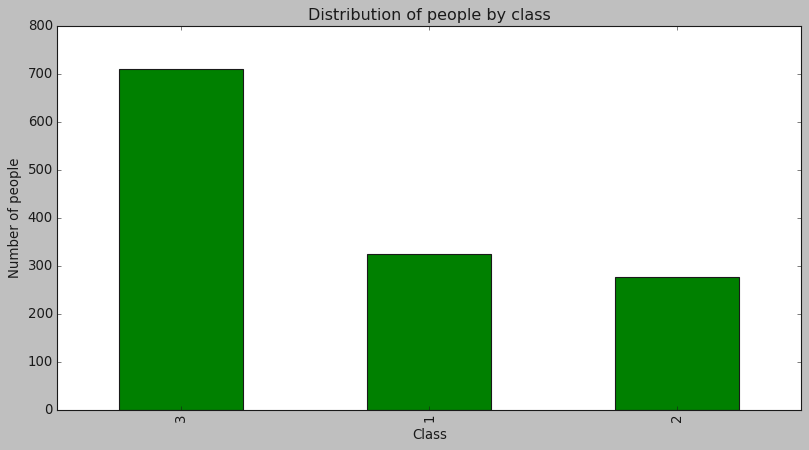

In [79]:
# your code here

titanic['Pclass'].value_counts().plot(kind='bar', color=["green"])
plt.title("Distribution of people by class")
plt.xlabel("Class")
plt.ylabel("Number of people")
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

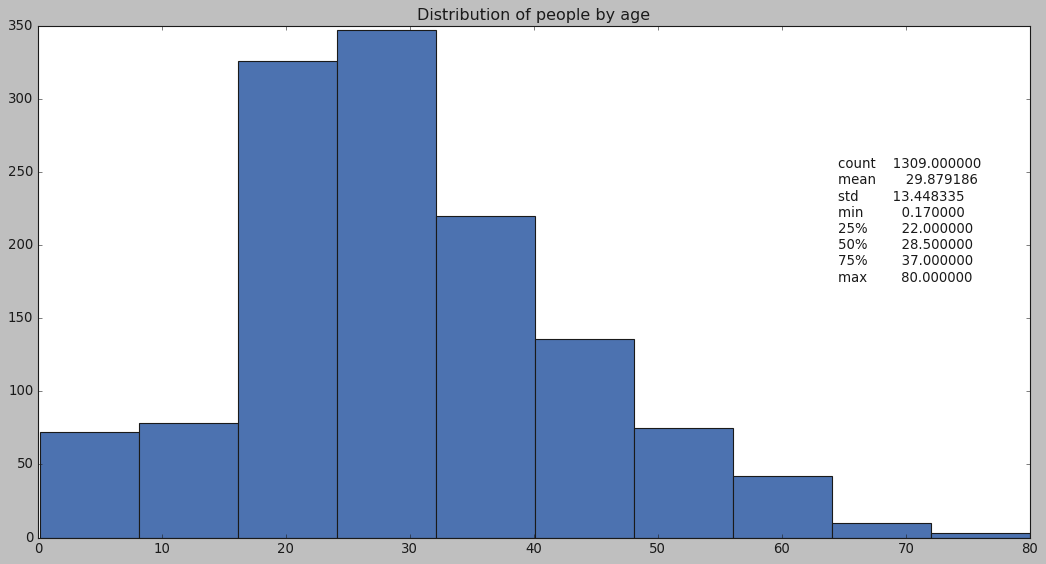

In [94]:
# your code here

fig, ax = plt.subplots(figsize=(16,8))
ax.hist(titanic["Age"])
plt.title("Distribution of people by age (summary)")
plt.figtext(0.75,0.5, titanic.Age.describe().to_string())
plt.show()


In [ ]:
"""
I found this solution online and adjusted it.
I think the histogram is probably the best to show the distribution, but it doesn't
include the summary of the data. Not sure how I would convey it on a plot, so this will do.
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
That most people were under 40?
and... that there were some elderly adventurers.
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here
#I just did? 

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
 ¯\_(ツ)_/¯
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

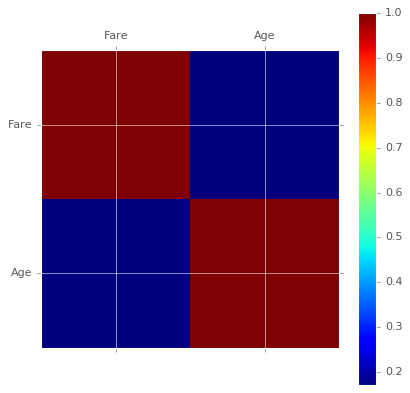

In [109]:
# Method 1 - matplotlib
# your code here

#we can plot a correlation matrix directly

fare_age = titanic[["Fare","Age"]]

plt.matshow(fare_age.corr())
plt.xticks(range(len(fare_age.columns)), fare_age.columns)
plt.yticks(range(len(fare_age.columns)), fare_age.columns)
plt.colorbar()
plt.show()

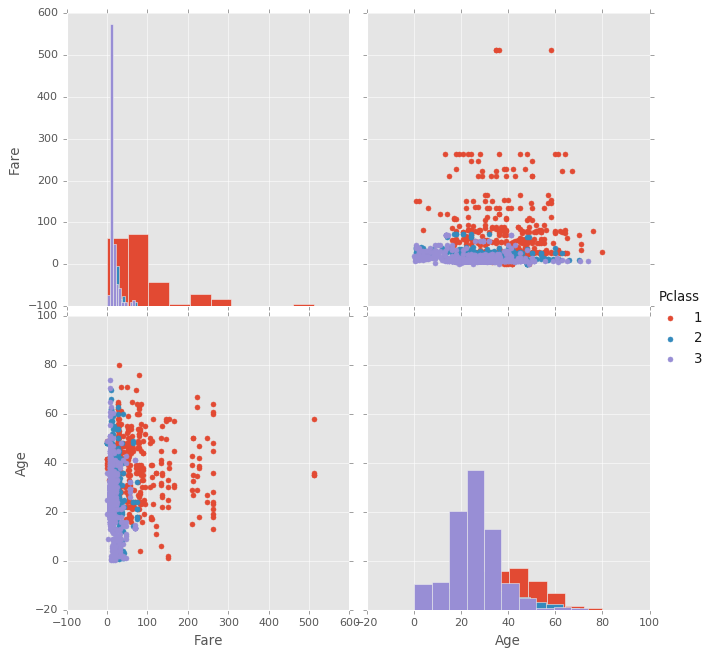

In [108]:
# Method 2 - seaborn
# your code here

# here I used pairplot
# added some hue for better readability

g = sns.PairGrid(titanic, vars=["Fare", "Age"], hue="Pclass", height=4)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);
g.add_legend();

#### Plot the correlation matrix using seaborn.

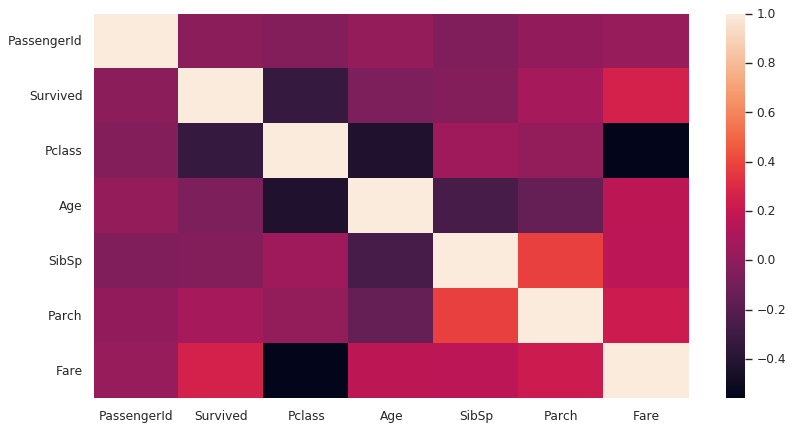

In [118]:
# your code here

corr = titanic.corr()
sns.heatmap(corr)

#### What are the most correlated features?

In [ ]:
"""

More strongly correlated, but inversely:

- Class and Fare - 1st class has higher fares (but 1 < 3)
- Class and Age

Not as stronlgy correlated, but also very correlated:
- survived and class
- age and sibsp (what is it?)
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

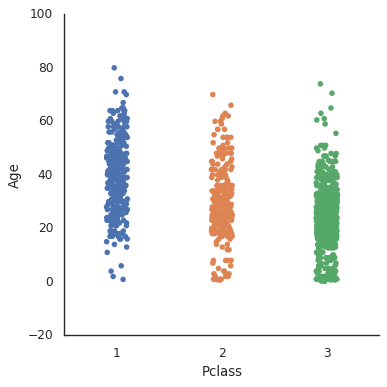

In [127]:
# your code here
sns.catplot(x="Pclass", y="Age", data=titanic)


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

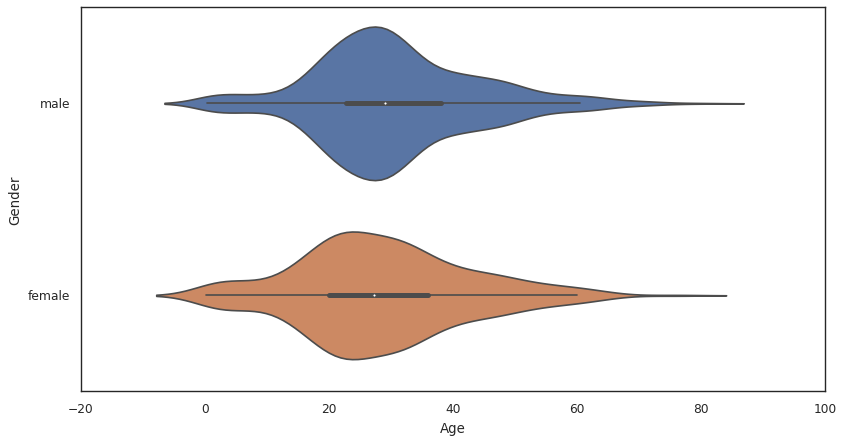

In [124]:
# your code here
#sorry, no facetgrid


sns.violinplot("Age", "Gender", data = titanic)